<a href="https://www.kaggle.com/code/gajnaselvi/cnn-convolution-neural-network?scriptVersionId=100898401" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import tensorflow as tf

**Part 1 : implementaion of simple artificial Neural Network**

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0 #to normalise

In [4]:
print("categorical labels")
print(y_train[0:5])

# make labels one hot encoded
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

print("one hot encoded labels")
print(y_train[0:5])

categorical labels
[5 0 4 1 9]
one hot encoded labels
tf.Tensor(
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(5, 10), dtype=float32)


2022-07-15 09:03:36.498888: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
print("number of training examples:" , x_train.shape)
print("number of test examples:" , x_test.shape)

number of training examples: (60000, 28, 28)
number of test examples: (10000, 28, 28)


In [6]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(50)#tensorflow to covert data into batches
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(50)

**Converting a 2D Image into a 1D Vector**
MNIST images are black and white thumbnail square images with 28x28 pixels. Each pixel is assigned an intensity (originally on a scale of 0 to 255). To make the input useful to us, we need these to be arranged in a 1D vector using a consistent strategy, as is shown in the figure below. We can use Flatten to accomplish this task.

In [7]:
# showing an example of the Flatten class and operation
from tensorflow.keras.layers import Flatten
flatten = Flatten(dtype='float32')

"original data shape"
print(x_train.shape)

"flattened shape"
print(flatten(x_train).shape)

(60000, 28, 28)
(60000, 784)


Assigning of weight and biases

In [8]:
# Weight tensor
W = tf.Variable(tf.zeros([784, 10], tf.float32))
# Bias tensor
b = tf.Variable(tf.zeros([10], tf.float32))

In [9]:
def forward(x):
    return tf.matmul(x,W) + b # this is how weight and biases were added

Softmax Regression
Softmax is an activation function that is normally used in classification problems. It generates the probabilities for the output. For example, our model will not be 100% sure that one digit is the number nine, instead, the answer will be a distribution of probabilities where, if the model is right, the nine number will have a larger probability than the other other digits.
Softmax is simply an exponential of each value of a vector that is also normalized. The formula is:

𝜎(𝑧𝑖)=𝑒𝑧𝑖/∑𝑒𝑧𝑖

In [10]:
def activate(x):
    return tf.nn.softmax(forward(x)) #fuction layer for output layer, inhibiting the softmax fuction

In [11]:
def model(x):
    x = flatten(x)
    return activate(x)

It is a function that is used to minimize the difference between the right answers (labels) and estimated outputs by our Network. Here we use the cross entropy function, which is a popular cost function used for categorical models. The function is defined in terms of probabilities, which is why we must used normalized vectors. It is given as:

𝐶𝑟𝑜𝑠𝑠𝐸𝑛𝑡𝑟𝑜𝑝𝑦=∑𝑦_𝐿𝑎𝑏𝑒𝑙⋅log(𝑦_𝑃𝑟𝑒𝑑)

In [12]:
def cross_entropy(y_label, y_pred):
    return (-tf.reduce_sum(y_label * tf.math.log(y_pred + 1.e-10)))
# addition of 1e-10 to prevent errors in zero calculations

# current loss function for unoptimized model
cross_entropy(y_train, model(x_train)).numpy()

138155.1

In [13]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.25)#setting of optimizers which help to change the value of the weights and biases according to the learning

In [14]:
def train_step(x, y ):
    with tf.GradientTape() as tape:
        #compute loss function(automaticv\ally record the gradient)
        current_loss = cross_entropy( y, model(x))
        # compute gradient of loss 
        grads = tape.gradient( current_loss , [W,b] )
        # Apply SGD step to our Variables W and b
        optimizer.apply_gradients( zip( grads , [W,b] ) )     
    return current_loss.numpy()

In [15]:
loss_values=[]
accuracies = []
epochs = 10

for i in range(epochs):
    j=0
    # each batch has 50 examples
    for x_train_batch, y_train_batch in train_ds:
        j+=1
        current_loss = train_step(x_train_batch, y_train_batch)
        if j%500==0: #reporting intermittent batch statistics
            print("epoch ", str(i), "batch", str(j), "loss:", str(current_loss) ) 
    
    # collecting statistics at each epoch...loss function and accuracy
    #  loss function
    current_loss = cross_entropy( y_train, model( x_train )).numpy()
    loss_values.append(current_loss)
    correct_prediction = tf.equal(tf.argmax(model(x_train), axis=1),
                                  tf.argmax(y_train, axis=1))
    #  accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
    accuracies.append(accuracy)
    print("end of epoch ", str(i), "loss", str(current_loss), "accuracy", str(accuracy) ) 

epoch  0 batch 500 loss: 200.91258
epoch  0 batch 1000 loss: 145.84247
end of epoch  0 loss 218521.44 accuracy 0.8197
epoch  1 batch 500 loss: 189.31265
epoch  1 batch 1000 loss: 195.50742
end of epoch  1 loss 216255.69 accuracy 0.82235
epoch  2 batch 500 loss: 159.4849
epoch  2 batch 1000 loss: 186.61008
end of epoch  2 loss 209955.78 accuracy 0.8308167
epoch  3 batch 500 loss: 171.41626
epoch  3 batch 1000 loss: 164.39377
end of epoch  3 loss 211311.44 accuracy 0.8291
epoch  4 batch 500 loss: 189.89433
epoch  4 batch 1000 loss: 161.48163
end of epoch  4 loss 204063.0 accuracy 0.83828336
epoch  5 batch 500 loss: 201.22147
epoch  5 batch 1000 loss: 198.68837
end of epoch  5 loss 209711.2 accuracy 0.83141667
epoch  6 batch 500 loss: 180.35646
epoch  6 batch 1000 loss: 192.11993
end of epoch  6 loss 204885.03 accuracy 0.8373167
epoch  7 batch 500 loss: 201.02682
epoch  7 batch 1000 loss: 153.70326
end of epoch  7 loss 205187.19 accuracy 0.8372833
epoch  8 batch 500 loss: 172.45277
epoch 

In [16]:
correct_prediction_train = tf.equal(tf.argmax(model(x_train), axis=1),tf.argmax(y_train,axis=1))
accuracy_train = tf.reduce_mean(tf.cast(correct_prediction_train, tf.float32)).numpy()

correct_prediction_test = tf.equal(tf.argmax(model(x_test), axis=1),tf.argmax(y_test, axis=1))
accuracy_test = tf.reduce_mean(tf.cast(correct_prediction_test, tf.float32)).numpy()

print("training accuracy", accuracy_train)
print("test accuracy", accuracy_test)

training accuracy 0.84421664
test accuracy 0.8375


Text(0, 0.5, 'loss')

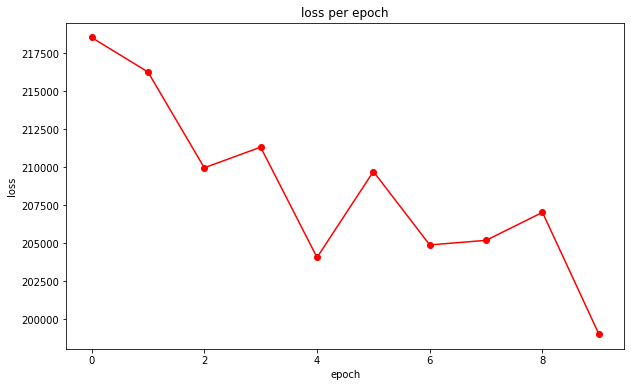

In [17]:
import matplotlib.pyplot as plt #error graph over epochs
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
#print(loss_values)
plt.plot(loss_values,'-ro')
plt.title("loss per epoch")
plt.xlabel("epoch")
plt.ylabel("loss")

Text(0, 0.5, 'accuracy')

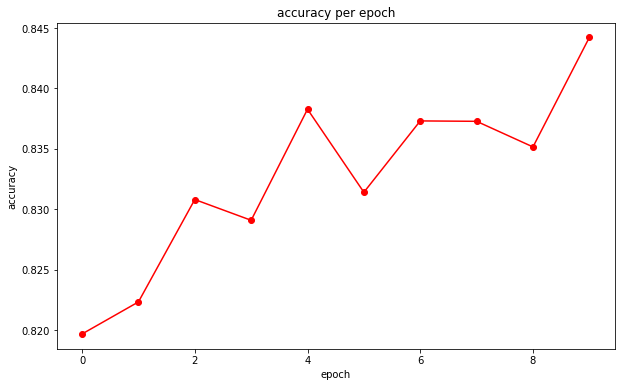

In [18]:
plt.plot(accuracies,'-ro')#accuracy graph over epochs
plt.title("accuracy per epoch")
plt.xlabel("epoch")
plt.ylabel("accuracy")

**Part2: Deep Learning applied on MNIST**

Now we are going to expand our knowledge using a Deep Neural Network.

Architecture of our network is:

* (Input) -> [batch_size, 28, 28, 1] >> Apply 32 filter of [5x5]
* (Convolutional layer 1) -> [batch_size, 28, 28, 32]
* (ReLU 1) -> [?, 28, 28, 32]
* (Max pooling 1) -> [?, 14, 14, 32]
* (Convolutional layer 2) -> [?, 14, 14, 64]
* (ReLU 2) -> [?, 14, 14, 64]
* (Max pooling 2) -> [?, 7, 7, 64]
* [fully connected layer 3] -> [1x1024]
* [ReLU 3] -> [1x1024]
* [Drop out] -> [1x1024]
* [fully connected layer 4] -> [1x10]
The next cells will explore this new architecture.

first to assign initial parameters 

In [19]:
width = 28 # width of the image in pixels 
height = 28 # height of the image in pixels
flat = width * height # number of pixels in one image 
class_output = 10 # number of possible classifications for the problem

In [20]:
x_image_train = tf.reshape(x_train, [-1,28,28,1])  
x_image_train = tf.cast(x_image_train, 'float32') 

x_image_test = tf.reshape(x_test, [-1,28,28,1]) 
x_image_test = tf.cast(x_image_test, 'float32') 

#creating new dataset with reshaped inputs
train_ds2 = tf.data.Dataset.from_tensor_slices((x_image_train, y_train)).batch(50)
test_ds2 = tf.data.Dataset.from_tensor_slices((x_image_test, y_test)).batch(50)

In [21]:
x_image_train = tf.slice(x_image_train,[0,0,0,0],[10000, 28, 28, 1])
y_train = tf.slice(y_train,[0,0],[10000, 10])

In [22]:
W_conv1 = tf.Variable(tf.random.truncated_normal([5, 5, 1, 32], stddev=0.1, seed=0))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32])) # need 32 biases for 32 outputs

In [23]:
def convolve1(x):
    return(
        tf.nn.conv2d(x, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1)

In [24]:
def h_conv1(x): return(tf.nn.relu(convolve1(x)))

In [25]:
def conv1(x):
    return tf.nn.max_pool(h_conv1(x), ksize=[1, 2, 2, 1], 
                          strides=[1, 2, 2, 1], padding='SAME')

In [26]:
W_conv2 = tf.Variable(tf.random.truncated_normal([5, 5, 32, 64], stddev=0.1, seed=1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64])) #need 64 biases for 64 outputs

In [27]:
def convolve2(x): 
    return( 
    tf.nn.conv2d(conv1(x), W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)

In [28]:
def h_conv2(x):  return tf.nn.relu(convolve2(x))

In [29]:
def conv2(x):  
    return(
    tf.nn.max_pool(h_conv2(x), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME'))

In [30]:
def layer2_matrix(x): return tf.reshape(conv2(x), [-1, 7 * 7 * 64])

In [31]:
W_fc1 = tf.Variable(tf.random.truncated_normal([7 * 7 * 64, 1024], stddev=0.1, seed = 2))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024])) # need 1024 biases for 1024 outputs

In [32]:
def fcl(x): return tf.matmul(layer2_matrix(x), W_fc1) + b_fc1

In [33]:
def h_fc1(x): return tf.nn.relu(fcl(x))

In [34]:
keep_prob=0.5
def layer_drop(x): return tf.nn.dropout(h_fc1(x), keep_prob)

In [35]:
W_fc2 = tf.Variable(tf.random.truncated_normal([1024, 10], stddev=0.1, seed = 2)) #1024 neurons
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10])) # 10 possibilities for digits [0,1,2,3,4,5,6,7,8,9]

In [36]:
def fc(x): return tf.matmul(layer_drop(x), W_fc2) + b_fc2

In [37]:
def y_CNN(x): return tf.nn.softmax(fc(x))

In [38]:
def cross_entropy(y_label, y_pred):
    return (-tf.reduce_sum(y_label * tf.math.log(y_pred + 1.e-10)))

In [39]:
optimizer = tf.keras.optimizers.Adam(1e-4)

In [40]:
variables = [W_conv1, b_conv1, W_conv2, b_conv2, 
             W_fc1, b_fc1, W_fc2, b_fc2, ]

def train_step(x, y):
    with tf.GradientTape() as tape:
        current_loss = cross_entropy( y, y_CNN( x ))
        grads = tape.gradient( current_loss , variables )
        optimizer.apply_gradients( zip( grads , variables ) )
        return current_loss.numpy()


In [41]:
correct_prediction = tf.equal(tf.argmax(y_CNN(x_image_train), axis=1), tf.argmax(y_train, axis=1))

In [42]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float32'))

In [43]:
loss_values=[]
accuracies = []
epochs = 1

for i in range(epochs):
    j=0
    # each batch has 50 examples
    for x_train_batch, y_train_batch in train_ds2:
        j+=1
        current_loss = train_step(x_train_batch, y_train_batch)
        if j%50==0: #reporting intermittent batch statistics
            correct_prediction = tf.equal(tf.argmax(y_CNN(x_train_batch), axis=1),
                                  tf.argmax(y_train_batch, axis=1))
            #  accuracy
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
            print("epoch ", str(i), "batch", str(j), "loss:", str(current_loss),
                     "accuracy", str(accuracy)) 
            
    current_loss = cross_entropy( y_train, y_CNN( x_image_train )).numpy()
    loss_values.append(current_loss)
    correct_prediction = tf.equal(tf.argmax(y_CNN(x_image_train), axis=1),
                                  tf.argmax(y_train, axis=1))
    #  accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
    accuracies.append(accuracy)
    print("end of epoch ", str(i), "loss", str(current_loss), "accuracy", str(accuracy) )  

epoch  0 batch 50 loss: 131.35843 accuracy 0.36
epoch  0 batch 100 loss: 47.695686 accuracy 0.72
epoch  0 batch 150 loss: 35.300697 accuracy 0.72
epoch  0 batch 200 loss: 28.769024 accuracy 0.88
epoch  0 batch 250 loss: 37.73268 accuracy 0.76
epoch  0 batch 300 loss: 24.366386 accuracy 0.88
epoch  0 batch 350 loss: 18.023132 accuracy 0.82
epoch  0 batch 400 loss: 19.877312 accuracy 0.86
epoch  0 batch 450 loss: 17.792213 accuracy 0.74
epoch  0 batch 500 loss: 13.432948 accuracy 0.86
epoch  0 batch 550 loss: 13.372465 accuracy 0.9
epoch  0 batch 600 loss: 14.384082 accuracy 0.84
epoch  0 batch 650 loss: 16.249172 accuracy 0.84
epoch  0 batch 700 loss: 9.517788 accuracy 0.98
epoch  0 batch 750 loss: 23.891665 accuracy 0.88
epoch  0 batch 800 loss: 13.761984 accuracy 0.98
epoch  0 batch 850 loss: 20.627327 accuracy 0.9
epoch  0 batch 900 loss: 9.940474 accuracy 0.9
epoch  0 batch 950 loss: 13.251138 accuracy 0.88
epoch  0 batch 1000 loss: 16.058905 accuracy 0.9
epoch  0 batch 1050 loss: 8

In [44]:
j=0
acccuracies=[]
# evaluate accuracy by batch and average...reporting every 100th batch
for x_train_batch, y_train_batch in train_ds2:
        j+=1
        correct_prediction = tf.equal(tf.argmax(y_CNN(x_train_batch), axis=1),
                                  tf.argmax(y_train_batch, axis=1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
        #accuracies.append(accuracy)
        if j%100==0:
            print("batch", str(j), "accuracy", str(accuracy) ) 
import numpy as np
print("accuracy of entire set", str(np.mean(accuracies)))

batch 100 accuracy 0.94
batch 200 accuracy 0.98
batch 300 accuracy 0.88
batch 400 accuracy 0.96
batch 500 accuracy 0.96
batch 600 accuracy 0.92
batch 700 accuracy 0.96
batch 800 accuracy 0.98
batch 900 accuracy 0.94
batch 1000 accuracy 0.98
batch 1100 accuracy 0.98
batch 1200 accuracy 1.0
accuracy of entire set 0.9404


In [45]:
kernels = tf.reshape(tf.transpose(W_conv1, perm=[2, 3, 0,1]),[32, -1])

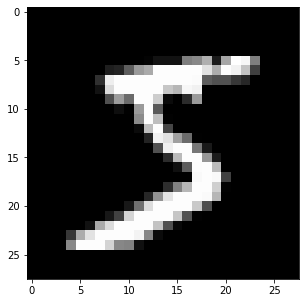

In [46]:
import numpy as np
plt.rcParams['figure.figsize'] = (5.0, 5.0)
sampleimage = [x_image_train[0]]
plt.imshow(np.reshape(sampleimage,[28,28]), cmap="gray")

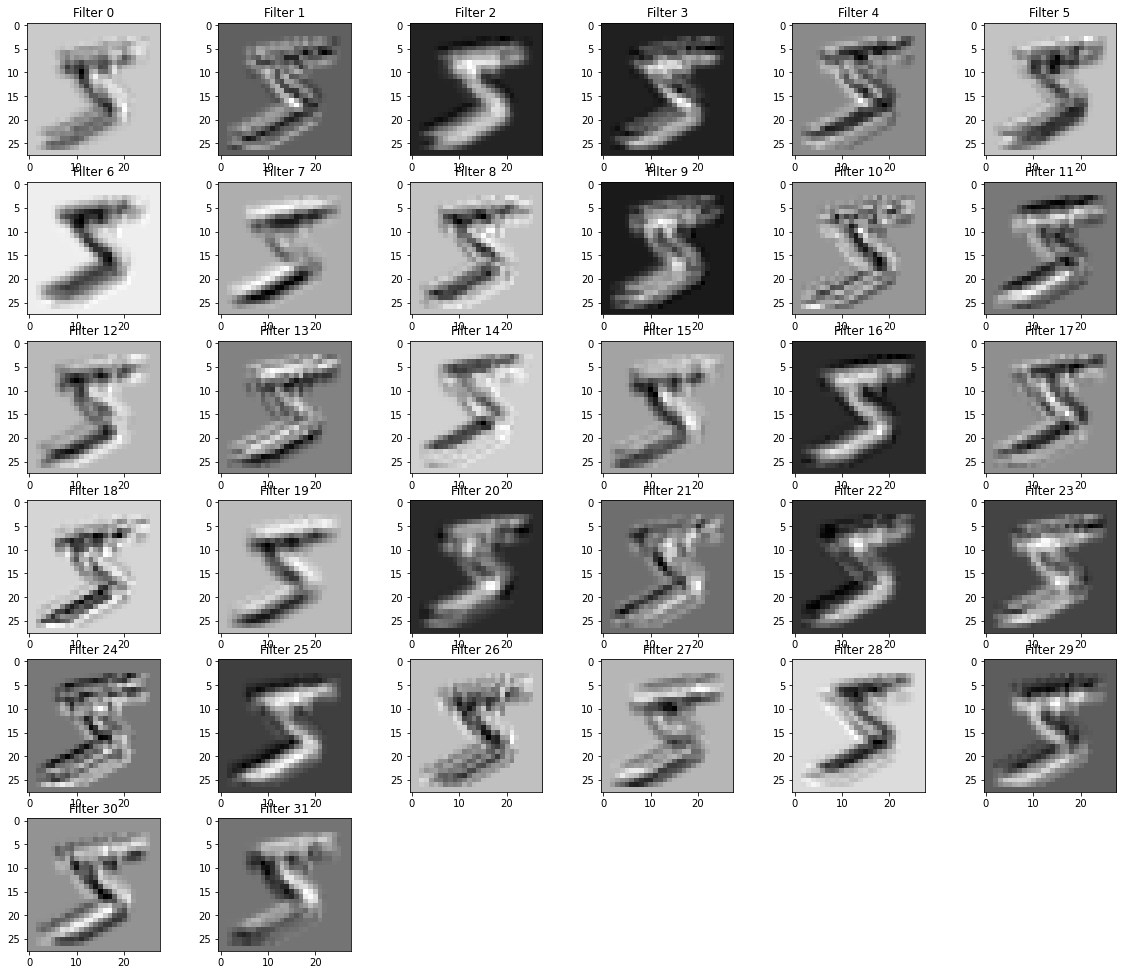

In [47]:
#ActivatedUnits = sess.run(convolve1,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
sampleimage=np.array(sampleimage)
keep_prob=1.0
ActivatedUnits = convolve1(sampleimage)
                           
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 6
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")

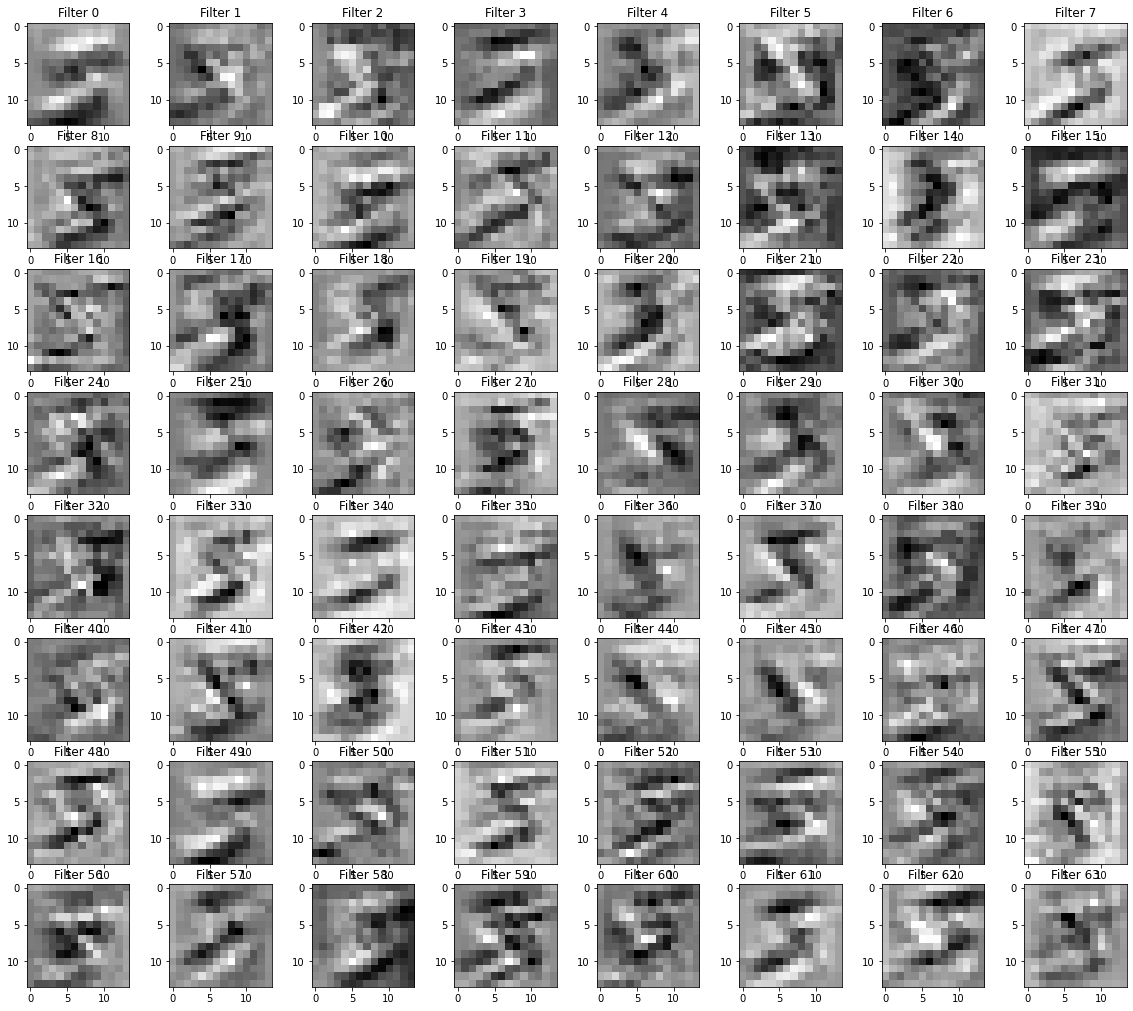

In [48]:
#ActivatedUnits = sess.run(convolve2,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
ActivatedUnits = convolve2(sampleimage)
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 8
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")